# Exploring the relation Social states and job preferences
###  An exercise in statistical inference with the GSS data

## About the data

General: The General Social Survey (GSS) gathers data on contemporary American society to monitor and explain trends and constants in attitudes, behaviors, and attributes. The GSS contains a standard core of demographic, behavioral, and attitudinal questions, plus topics of special interest. Among the topics covered are civil liberties, crime and violence, intergroup tolerance, morality, national spending priorities, psychological well-being, social mobility, and stress and traumatic events. [Source](http://gss.norc.org/About-The-GSS)

Data collection methodology: The target population of the GSS is adults (18+) living in households in the United States. The GSS sample is drawn using an area probability design that randomly selects respondents in households across the United States to take part in the survey. Respondents that become part of the GSS sample are from a mix of urban, suburban, and rural geographic areas. Participation in the study is voluntary. The survey is conducted face-to-face with an in-person interview which takes about 90 minutes to administer. [Source](https://en.wikipedia.org/wiki/General_Social_Survey#Methodology)

Scope of inference: By survey design, the scope of inference is the entire adult population of the United States. However, the survey was translated and administered in Spanish starting only at 2006 and therefore and therefore inference can be carried for Spanish speaking population, prior to 2006. Also, the GSS cannot be used to establish causality between two factors, however, it can be used to establish association between various factors.

## Research question

I am interested in the association between social class with respect to job related preferences in general and to job security in particular. My basic assumption (or null hypothesis if you wish) is that survey participants from lower social class would prefer jobs with higher payment or stability, while participants from high social class would prefer jobs with which provide more satisfaction or interest.

This question is interesting because it could help predict trends in jobs market as well as career expectations for future generations which gradually become richer and are less concerned with the challenges of "survival" which are more typical for the lower classes.

## Exploratory data analysis (EDA)

We begin with loading the data as well as other important libraries:

In [1]:
load('gss.Rdata')
# realy hard work here to supress annoying messages
suppressWarnings(library(ggplot2))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(gridExtra)))
library(statsr)

Ideally, we would want to print summary statistics, however, the GSS data is so large to the extent that that wouldn't be useful in this stage. We will start by generating a subset of the data which contains only the variables of interest to us. We will look at:

1. `jobinc`: Importance of high income.
2. `jobsec`: Importance of no danger of being fired.
3. `jobpromo`: Importance of change for advancement.
4. `jobmeams`: Importance of work importance and accomplishment.
5. `class`: Subjective class identification.

Let's generate a new data frame `gss_job` and look at its summary statistics:

In [2]:
gss_job = gss %>%
    select(jobinc, jobsec, jobpromo, jobmeans, class)

In [3]:
summary(gss_job)

       jobinc            jobsec           jobpromo          jobmeans    
 Most Impt: 4429   Most Impt: 1739   Most Impt: 3810   Most Impt: 9641  
 Second   : 4974   Second   : 2781   Second   : 7082   Second   : 3899  
 Third    : 6034   Third    : 4133   Third    : 4824   Third    : 3245  
 Fourth   : 3607   Fourth   : 6516   Fourth   : 3085   Fourth   : 2450  
 Fifth    : 1528   Fifth    : 5405   Fifth    : 1769   Fifth    : 1333  
 NA's     :36489   NA's     :36487   NA's     :36491   NA's     :36493  
           class      
 Lower Class  : 3147  
 Working Class:24458  
 Middle Class :24289  
 Upper Class  : 1741  
 No Class     :    1  
 NA's         : 3425  

At first look it seems that there is sufficient data for each one of the variables to provide statistically meaningful results. To simplify things, let us remove all observations with missing data: 

In [4]:
gss_job = na.omit(gss_job) 

Let's plot the distribution of all job-related variables:

In [5]:
gr_inc = ggplot(gss_job, aes(jobinc, fill=jobinc)) + geom_bar() + labs(title = "Income") + guides(fill=FALSE)
gr_sec = ggplot(gss_job, aes(jobsec, fill=jobsec)) + geom_bar() + labs(title = "Security") + guides(fill=FALSE)
gr_promo = ggplot(gss_job, aes(jobpromo, fill=jobpromo)) + geom_bar() + labs(title = "Promotion") + guides(fill=FALSE)
gr_means = ggplot(gss_job, aes(jobmeans, fill=jobmeans)) + geom_bar() + labs(title = "Meaning") + guides(fill=FALSE)

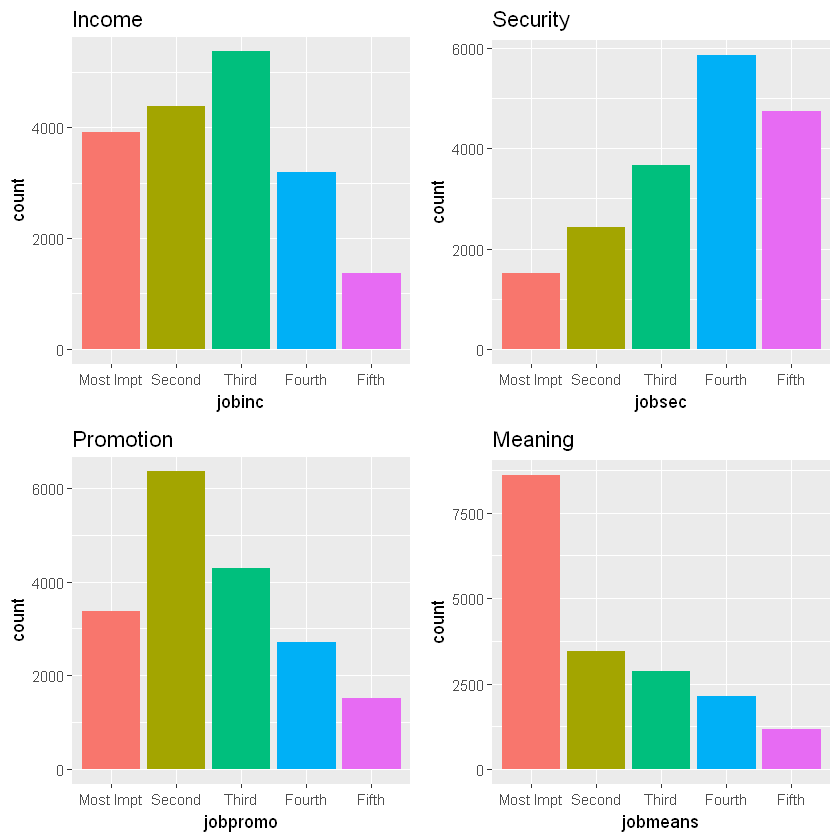

In [6]:
grid.arrange(gr_inc, gr_sec, gr_promo, gr_means, ncol=2, nrow =2)

Summary of observations: Compared to all other variables we've looked at, it seems that heaving a meaningful job is very important. On the contrary, having job security seems to be of lesser importance. Hight income is of moderate to high importance as well as the possibly of job promotion.

Let us now look at the median values using the `class` variable as grouping variable. In the following table the values range between 1 (most important) to 5 (less important):

In [7]:
gss_job %>%
    group_by(class) %>%
    summarise(income = median(as.numeric(jobinc)), 
              security = median(as.numeric(jobsec)),
              promotion = median(as.numeric(jobpromo)),
              meaning = median(as.numeric(jobmeans)),
              count = n())

class,income,security,promotion,meaning,count
Lower Class,2,3,3,2.0,884
Working Class,3,4,2,2.0,8366
Middle Class,3,4,2,1.0,8414
Upper Class,3,4,3,1.5,566
No Class,4,3,2,1.0,1


It can be seen in the table that job income a security is more important for the lower class, while having a meaningful job is more important for the middle and upper classes.

Let us also look at the means:

In [8]:
gss_job %>%
    group_by(class) %>%
    summarise(income = mean(as.numeric(jobinc)), 
              security = mean(as.numeric(jobsec)),
              promotion = mean(as.numeric(jobpromo)),
              meaning = mean(as.numeric(jobmeans)),
              count = n())

class,income,security,promotion,meaning,count
Lower Class,2.426471,3.223982,2.778281,2.591629,884
Working Class,2.620727,3.410471,2.599570,2.237868,8366
Middle Class,2.726171,3.693725,2.569170,1.937010,8414
Upper Class,2.510601,3.780919,2.676678,2.022968,566
No Class,4.000000,3.000000,2.000000,1.000000,1


Meaningful work is less important for lower class (mean = 2.6) and more important for upper and middle class (means = 2.0 and 1.9 respectively). Also, job security and income are important for the lower class (mean = 3.2 and 2.4) and less important for upper class (mean = 3.8 and 2.5).

## Inferenece

From our EDA it seems as there are evidence that job security (not being fired) is associated with social class where lower classes hold that job security is of higher importance than the upper class. I am interested in performing statistical analysis to quantify whether there is significant evidence for that or in more statistical terms: is there association between `jobinc` and `class`. It is also interesting to look at importance of having a meaningful job `jobmeans` - so we'll also do that.

The null hypothesis is that there is that the importance of job security is equal for all, regardless of their social class (no association). The alternative hypothesis is that job security significantly differs between the social classes:

$\mu_0$ = job security is equally important for people of all social classes (`jobsec` and `class` are not associated)

$\mu_1$ = job security is different for people of different social classes (`jobsec` and `class` are associated)

Since the observations are categorical with more than two levels, we will use the "chi-square ($\chi^2$) test of independence" test. Let us check the conditions:
1. Observations independence: The observations are taken from un-correlated individuals and are therefore independent.
2. Expected counts (minimum 5): There are at least 566 observations.
3. Degrees of freedom (minimum 2): There are 5 possible answers for importance and 5 different social class, such that there are $(5-1)\dot(5-1)=16$ degrees of freedom.

All requirements for the $\chi^2$ test are met. We can go ahead to do the inference:

Warning message:
"Ignoring null value since it's undefined for chi-square test of independence"Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"

Response variable: categorical (5 levels) 
Explanatory variable: categorical (5 levels) 
Observed:
               y
x               Most Impt Second Third Fourth Fifth
  Lower Class         105    169   196    251   163
  Working Class       793   1287  1823   2619  1844
  Middle Class        574    918  1565   2811  2546
  Upper Class          33     65    90    183   195
  No Class              0      0     1      0     0

Expected:
               y
x                 Most Impt       Second        Third       Fourth        Fifth
  Lower Class    72.9757007  118.2642751  178.1964785  284.3385442  230.2250014
  Working Class 690.6275026 1119.2295541 1686.4159947 2690.9233723 2178.8035763
  Middle Class  694.5899841 1125.6511437 1696.0918216 2706.3625693 2191.3044814
  Upper Class    46.7242609   75.7212440  114.0941254  182.0538643  147.4065054
  No Class        0.0825517    0.1337831    0.2015797    0.3216499    0.2604355

H0: class and jobsec are independent
HA: class and jobsec are d

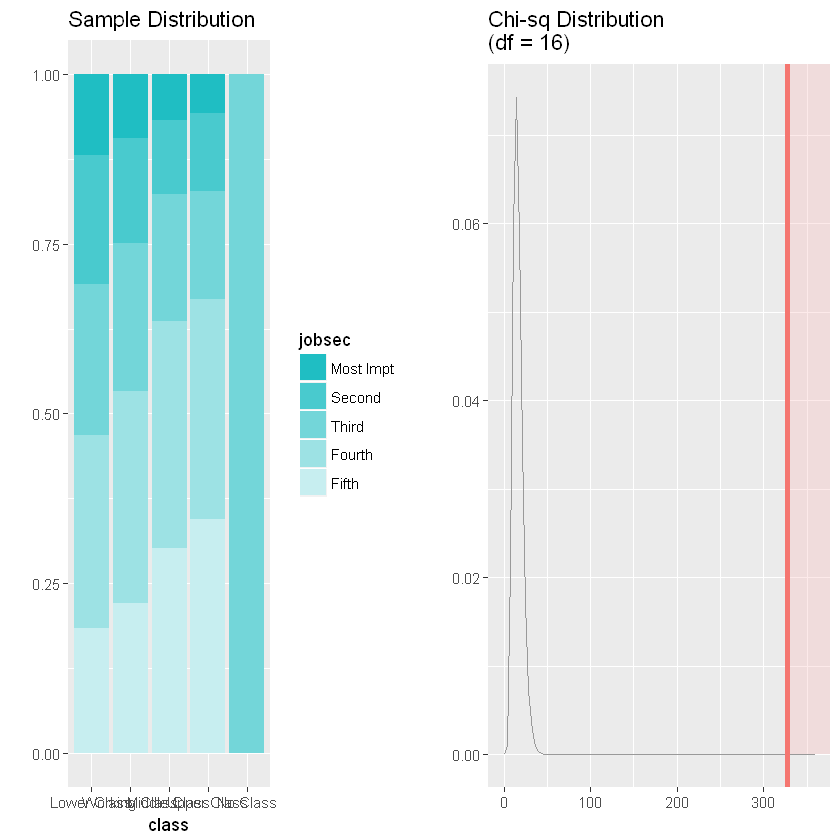

In [9]:
inference(jobsec, class, data=gss_job, type = "ht", method = "theoretical", alternative="greater", null=0, statistic = "proportion")

Since the p-value is close to zero, we can reject the null hypothesis that the importance of job security is independent of social class.

Now, let's do the same hypothesis test also for `jobmeans` (importance and accomplishment):

Warning message:
"Ignoring null value since it's undefined for chi-square test of independence"Warning message in chisq.test(x, y, correct = FALSE):
"Chi-squared approximation may be incorrect"

Response variable: categorical (5 levels) 
Explanatory variable: categorical (5 levels) 
Observed:
               y
x               Most Impt Second Third Fourth Fifth
  Lower Class         284    164   175    151   110
  Working Class      3597   1584  1415   1138   632
  Middle Class       4449   1597  1202    781   385
  Upper Class         283    115    76     56    36
  No Class              1      0     0      0     0

Expected:
               y
x                  Most Impt       Second        Third      Fourth        Fifth
  Lower Class    417.6828479  167.7713784  139.0659865 103.0872689  56.39251824
  Working Class 3952.8673139 1587.7549229 1316.0928090 975.5973891 533.68756514
  Middle Class  3975.5469256 1596.8646810 1323.6439032 981.1948878 536.74960233
  Upper Class    267.4304207  107.4192310   89.0399868  66.0038396  36.10652186
  No Class         0.4724919    0.1897866    0.1573145   0.1166146   0.06379244

H0: class and jobmeans are independent
HA: class and jobmeans a

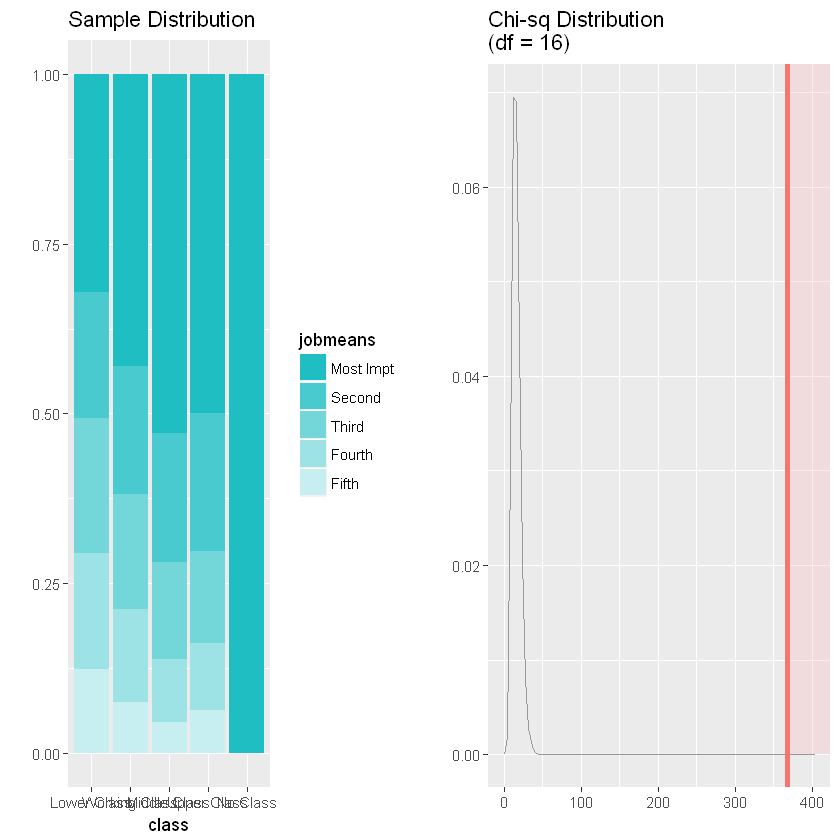

In [10]:
inference(jobmeans, class, data=gss_job, type = "ht", method = "theoretical", alternative="greater", null=0, statistic = "proportion")

Again, since the p-value is close to zero, we can reject the null hypothesis that `jobmenas` is independent of social class.

We conclude by stating that there is strong evidence that a person’s job preferences (job security and importance and accomplishment) are associated to his social class.

--------------

As a closing comment, the same $\chi^2$ test of independence can be performed using the `chisq` command:

In [11]:
chisq.test(gss_job$class, gss_job$jobsec)

Warning message in chisq.test(gss_job$class, gss_job$jobsec):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  gss_job$class and gss_job$jobsec
X-squared = 326.69, df = 16, p-value < 2.2e-16
